<a href="https://colab.research.google.com/github/marcosmvgs/CEAAE---Ostensivo/blob/main/Lista_de_exerc%C3%ADcios_3_GE_803.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LISTA DE EXERCÍCIOS 3**

Data de entrega:
OBS: Para alguns exercícios será necessário utilizar uma linguagem de programação.

Nome: Ten Marcos


##**Questão 1** 
Preencha a tabela apresentada a seguir usando o conceito de FOV e a transformação de ângulo
em radianos para graus

| FOV (mrad) | d(m) | s(m)  |
|------------|------|-------|
| 100        | 300  | 30,03      |
| 845,7           | 3    | 2, 7  |
| 88         |   240,18   | 21,15 |


Tabela com a conversão da unidade do FOV de mrad para °:

| FOV (°C) | d(m) | s(m)  |
|------------|------|-------|
| 5,729        | 300  | 30,03      |
| 48,45           | 3    | 2, 7  |
| 5,04         |   240,18   | 21,15 |

## **Questão 2**
O helicóptero H36 Caracal tem como maior dimensão o seu comprimento, de 19,5 metros.
Supondo que um equipamento de medição de IR tem FOV circular de 100 mrad, a que distância deve ser colocado o equipamento para que o helicóptero esteja contido inteiramente em seu FOV? Se for considerada uma margem de segurança de 10% no comprimento do H36 (já que em uma medição operacional em campo o helicóptero não fica completamente imóvel), a que distância dever ser colocado o equipamento?

In [272]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from matplotlib.patches import Polygon
import matplotlib.gridspec as gridspec

In [273]:
s = 19.5 # Comprimento do helicoptero
FOV = 100 
s *= 1.1 # Comprimento adicionado da margem de segurança
d = s/(2*np.tan(100/2000)) # equação que resulta na distância necessária entre equipamento e aeronave
print(f'Para as condições do H36 dadas no exercício o equipamento deve ser colocado\na {round(d, 2)} metros do helicóptero, considerando 10% de segurança em relação ao comprimento da aeronave')

Para as condições do H36 dadas no exercício o equipamento deve ser colocado
a 214.32 metros do helicóptero, considerando 10% de segurança em relação ao comprimento da aeronave


In [274]:
s = 11.338
s *=1.1
d = s/(2*np.tan(100/2000))
print(f'Para as condições do A29 o equipamento deve ser colocado\na {round(d, 2)} metros da aeronave, considerando 10% de segurança em relação ao comprimento da aeronave')

Para as condições do A29 o equipamento deve ser colocado
a 124.61 metros da aeronave, considerando 10% de segurança em relação ao comprimento da aeronave


---

##**Questão3**
O ângulo linear  subentendido por um comprimento de arco s a partir da origem de um
círculo de raio r é definido como  $\theta$ = s/r. Se s é o cateto oposto do triângulo retângulo formado
com o lado r, tem-se que $s_1$ = 2tg($\theta$/2). Afirma-se que para ângulos de visada  pequenos
pode-se usar a definição $s$ = $\theta$r , ao invés do cálculo exato $s_1$. Usando o Matlab, plote a curva do erro efetuado ao usar-se essa aproximação para ângulos de 0,01 a 45° (use erro(%) = 100· valor_absoluto (– )/ )

In [275]:
r = 1
angulos = np.arange(0.01, 45, 0.01)

def erro(angulos):
  s1 = 2*r*(np.tan((angulos/2)*(np.pi/180)))
  s = r*(angulos)*(np.pi/180)
  erro = 100*(abs(s-s1)/s1)
  return erro

erro = erro(angulos)

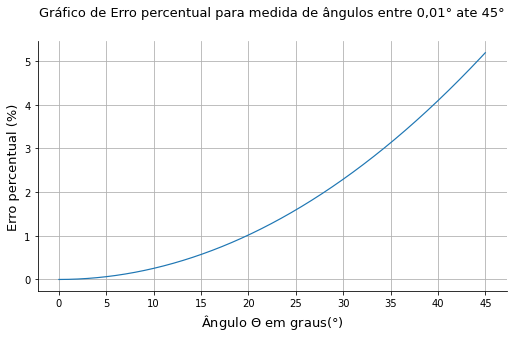

In [276]:
fig, ax = plt.subplots(figsize = (7, 4))

ax.plot(angulos, erro, linewidth = 1.2)
plt.tight_layout()
plt.title('Gráfico de Erro percentual para medida de ângulos entre 0,01° ate 45°',
          pad = 25,
          fontsize = 13)
plt.xticks(np.arange(0, 50, 5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Erro percentual (%)', fontsize = 13)
ax.set_xlabel('Ângulo $\Theta$ em graus(°)', fontsize = 13)
plt.grid()
plt.show()


---

##**Questão 4**
Considerando a geometria a seguir, complete a tabela.


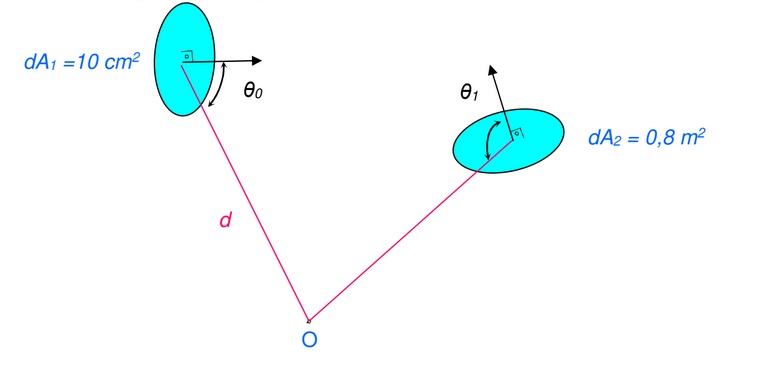

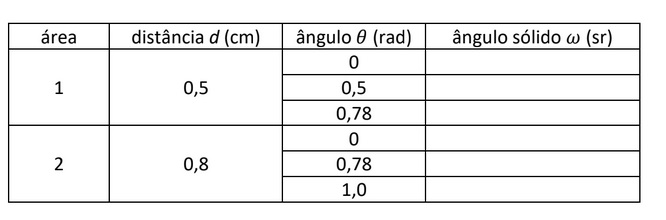

**Resposta**

Tabela preenchida abaixo considerando as distâncias em metros

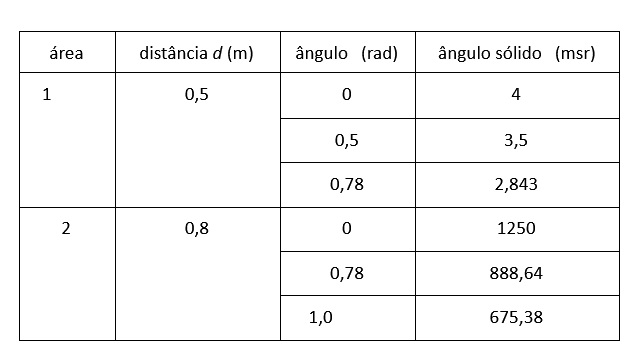

##**Questão 5**
Calcule os valores da curva de Planck para T = 1000 K. Utilize como vetor de comprimentos de
onda λ os valores, em micrometros: 0.01, 0.02, 0.03, ... , 50. Faça um gráfico da exitância espectral,
com λ no eixo , e insira como título o valor da integral da curva de Planck (, T), ou seja,

In [277]:
def M_spectral(T, comp_onda, emissividade=1, transmitancia=1, resp=1):
    
    '''
    (float, float/list) -> float/list
    Recebe temperatura em K e comprimento de onda em micrometro e retorna Exitancia espectal em W/m2*microm
    '''
    c1 = 3.74177107 * 10**8 #Constante C1, em W.um^2
    c2 = 14387.752 #Constante C2, em um.K
    n = 1 #indice de refracao
    
    #Calculo do primeiro fator: c1/(n^2.lambda^5)
    fator1 = c1/((n**2)*(comp_onda**5))
    
    #Calculo do denominador do 2o fator
    fator2 = np.exp(c2/(n*comp_onda*T))-1
    
    M = fator1 / fator2 # %W/(m^2.um)
    emiss = emissividade
    transmit = transmitancia
    resp = resp

    return M*emiss*transmit*resp

In [278]:
T = 1000
comp_onda = np.arange(0.01, 50, 0.01)
m1 = M_spectral(T, comp_onda)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


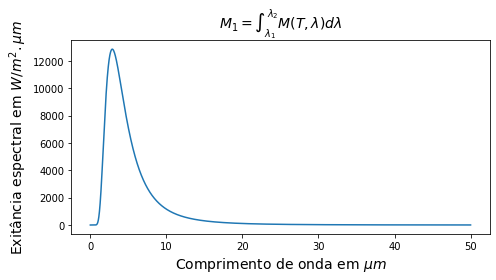

In [279]:
fig2, ax2 = plt.subplots(figsize = (7, 4))

ax2.plot(comp_onda, m1)
ax2.set_ylabel('Exitância espectral em $W/m^2 . \mu m$', fontsize = 14)
ax2.set_xlabel('Comprimento de onda em $\mu m$', fontsize = 14)
plt.title('$M_{1} = \int_{\lambda _{1}}^{\lambda_{2}} M(T, {\lambda} )d{\lambda}$', fontsize = 14)
plt.tight_layout()
plt.show()

Faça o cálculo da exitância total emitida, , pela equação de Stephan-Boltzmann. Qual a relação
entre os valores  e ?

In [280]:
const = 5.67*10**(-8)
stefan = const*(T**(4))
m2 = stefan
print(f'A exitância total emitida pela Lei de Stefan Boltzman é de {round(m2)}W/m²')

A exitância total emitida pela Lei de Stefan Boltzman é de 56700W/m²


In [281]:
integral = round(np.trapz(m1, comp_onda), 6)
print(f'A exitância total emitida fazendo a integração da curva de Planck é de {round(integral, 2)}W/m²')
erro = 100*(abs(m2-integral)/integral)
print(erro)

A exitância total emitida fazendo a integração da curva de Planck é de 56641.81W/m²
0.1027394509044862


De acordo com os resultados acima podemos verificar que a relação entre $M_{1}$ e $M_{2}$ resultou em um erro de aproximadamente 0.102%

---

##**Questão 6**
Calcule os valores da curva de Planck para T = 2000 K. Utilize como vetor de comprimentos de
onda λ valores de 0,8 a 6,0 μm, contendo pelo menos 500 valores igualmente espaçados. Verifique
o máximo da função para apontar exatamente qual o comprimento de onda onde ocorre o
máximo da função. O resultado é próximo ao esperado pela lei de Wien?

In [282]:
T = 2000
comp_onda = np.linspace(0.8, 6, 500)
exit_espec = M_spectral(T, comp_onda)

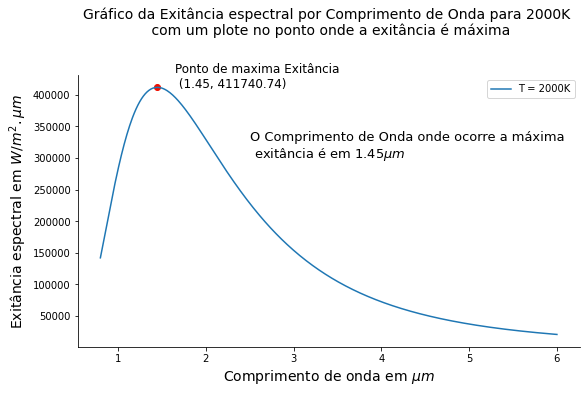

In [283]:
fig3, ax3 = plt.subplots(figsize = (9,5))

ax3.plot(comp_onda, exit_espec, linewidth = 1.5, label = 'T = 2000K')
for i in range(0, len(exit_espec)):
  if exit_espec[i] == max(exit_espec):
    comp_onda_max = comp_onda[i]
ax3.scatter(comp_onda_max, max(exit_espec), color = '#F00F00')
ax3.annotate(f'Ponto de maxima Exitância  \n {round(comp_onda_max, 2),round(max(exit_espec), 2)}', xy=(comp_onda_max+0.2, max(exit_espec)),
             fontsize = 12)
ax3.annotate(f'O Comprimento de Onda onde ocorre a máxima \n exitância é em {round(comp_onda_max, 2)}$\mu m$', xy=(2.5,300000),
             fontsize = 13)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_ylabel('Exitância espectral em $W/m^2 . \mu m$', fontsize = 14)
ax3.set_xlabel('Comprimento de onda em $\mu m$', fontsize = 14)
plt.title('Gráfico da Exitância espectral por Comprimento de Onda para 2000K \n com um plote no ponto onde a exitância é máxima', pad = 40, fontsize= 14)
plt.legend()

plt.show()

---

##**Questão 7**

Estude as seções 3.1, 3.2 e 3.3 da Dissertação de Mestrado intitulada Análise da capacidade de
sobrevivência em combate de aeronaves sob ameaça de mísseis ar-ar infravermelhos,
apresentada por Anderson Gomes do Rosário Werneck em 2016 no programa de pós-graduação
PPGAO do ITA. O documento está disponível na biblioteca do ITA.
Relativamente ao item 4.3.1 Fonte isotrópica de formato esférico da referida dissertação, avalie a
intensidade radiante de uma esfera de 1 metro de diâmetro a 500 oC (considerando-a como um
corpo negro isotrópico) para dois casos: 0 < λ < ∞ (todo espectro eletromagnético, usando a lei de
Stefan-Boltzmann) e na banda 3μm < λ < 5μm (usando o Matlab). Note que os valores de diâmetro
e temperatura indicados no exercício são diferentes dos utilizados na dissertação do Werneck.

In [331]:
h= 6.63*10e-34 # J*s - cte de Plank
c= 299792458 # m/s - Vel Luz
k= 1.38*10e-23 # J/K - cte Stefan-Boltzman

# Energia radiante = h*c/Lambda = h*f
def energia_radiante (comp_onda):
    E = h*c/comp_onda
    return E


# FI - Fluxo radiante - energia radiante por unidade de tempo
def fluxo_radiante(comp_onda, area=1):
    """
    comp_onda em micrometros
    area em m²
    """
    
    eng_rad = h*c/comp_onda*10e-6
    fluxo_rad = eng_rad/area
    return np.array(fluxo_rad)


# intensidade radiante = fluxo radiante por unidade de angulo sólido
def intensiade_radiante(fluxo_rad,area, theta):
    """
    fluxo rad = [W/s] = [J]
    area = [m²]
    theta = [rad]
    
    angulo sólido de uma fonte radiante é de 4pi em todas as direções
    angulo sólido projetado = Area*cos (theta)
    """
    
    ang_solido_proj = area*cos(theta)
    
    int_rad= fluxo_rad/ang_sol
    return int_rad

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


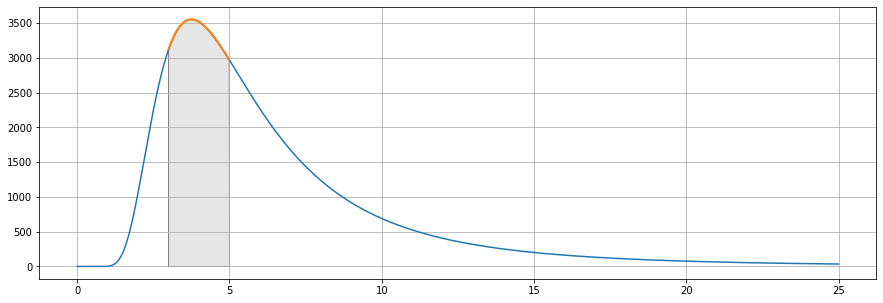

O valor da Intensidade Radiante de 3 a 5 foi de 6698.45 [W/sr]
O valor da Intensidade Radiante Total foi de 20259.94 [W/sr]


In [337]:
"""
Intensidade Radiante?
Esfera r=1m
T = 500°C

"""

comp_onda5 = np.arange(3,5, 0.01)
T=500+273.15 # Kelvin
area_alvo = 4*np.pi*1**2

exit_alvo = M_spectral(T,comp_onda5)

i_rad = exit_alvo*area_alvo/(4*np.pi)

fig,ax= plt.subplots(ncols=1, figsize=(15,5))

ax.plot(np.arange(0,25,0.01), M_spectral(T,np.arange(0,25,0.01)))
ax.plot(comp_onda5, i_rad, label='Intensiade Radiante', linewidth='2')
ax.grid()

ix= comp_onda5
iy= exit_alvo
verts= [(3,0), *zip(ix,iy), (5,0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.show()

i_rad_3_5 = np.trapz(i_rad, comp_onda5)
print(f'O valor da Intensidade Radiante de 3 a 5 foi de {round(i_rad_3_5,2)} [W/sr]')

sigma=5.67*10**-8 #
i_total = sigma*T**4
print(f'O valor da Intensidade Radiante Total foi de {round(i_total,2)} [W/sr]')

##**Questão 8** 

Num dado experimento, um objeto, a 1000 K, está sendo observado por uma câmera MWIR. Determine a exitância que será detectada pelo dispositivo eletro-óptico, na banda de 3-5 μm, determinando também as exitâncias, na mesma banda, nos passos intermediários. Ou seja, determinar as seguintes integrais:

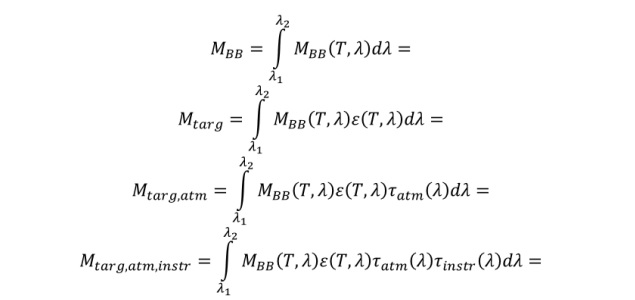

In [284]:
def interpolar(x, y, intervalo):
  x = x
  y = y
  f = interp1d(x, y, kind='linear')
  dados_interp = f(intervalo)
  return dados_interp


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


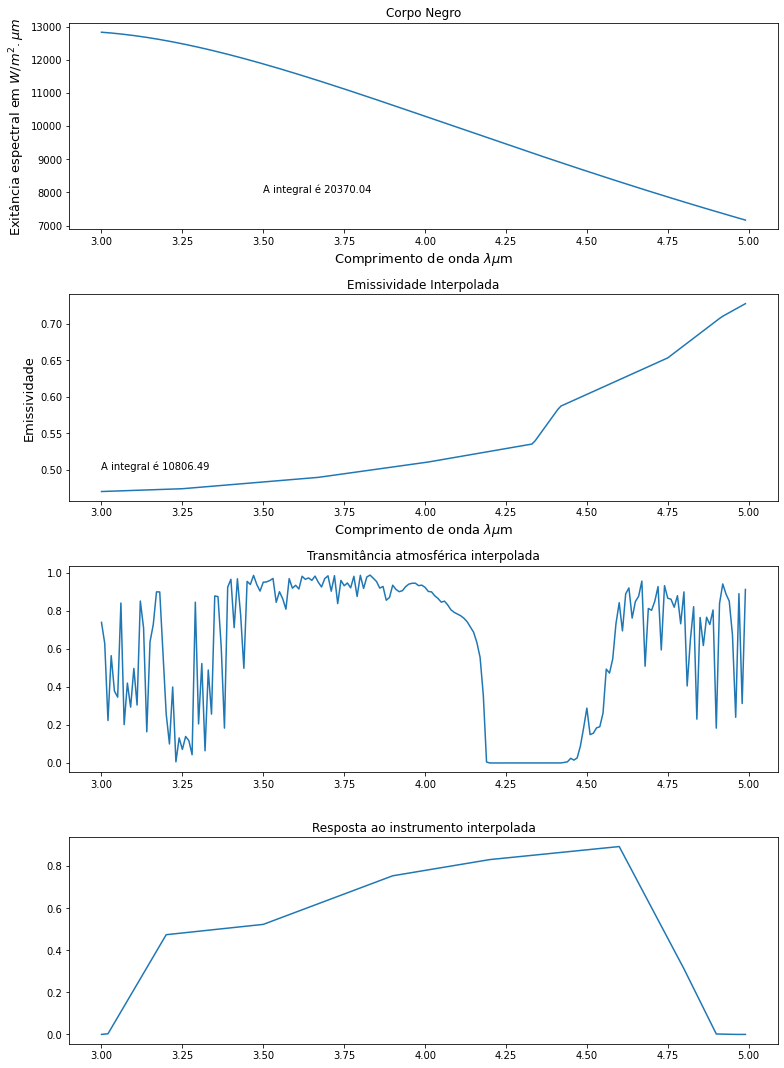

In [285]:
comp_onda = np.arange(3, 5, 0.01)
exit = M_spectral(1000, comp_onda)

fig = plt.figure(figsize=(11,15))
spec = fig.add_gridspec(nrows=4, ncols=1)

#Primeiro Plote
ax1 = fig.add_subplot(spec[0])
ax1.plot(comp_onda, exit)

integral = np.trapz(exit, comp_onda)

ax1.annotate(f'A integral é {round(integral, 2)}', xy=(3.5,8000))
ax1.set_title('Corpo Negro')
ax1.set_xlabel('Comprimento de onda $\lambda{\mu}$m', fontsize = 13)
ax1.set_ylabel('Exitância espectral em $W/m^2 . \mu m$', fontsize = 13)

#Segundo plote
emiss = pd.read_csv('/content/obj_emiss.txt', sep = '\t', names = ['comp_onda', 'Emissividade'])
x = emiss['comp_onda']
y = emiss['Emissividade']

dados_emiss = interpolar(x, y, comp_onda)
exit_emiss = M_spectral(1000, comp_onda, dados_emiss)
integral = np.trapz(exit_emiss, comp_onda)

ax2 = fig.add_subplot(spec[1])
ax2.plot(comp_onda, dados_emiss)
ax2.annotate(f'A integral é {round(integral, 2)}', xy=(3,0.5))
ax2.set_title('Emissividade Interpolada')
ax2.set_xlabel('Comprimento de onda $\lambda{\mu}$m', fontsize = 13)
ax2.set_ylabel('Emissividade', fontsize = 13)


#Terceiro plot
ax3 = fig.add_subplot(spec[2])
transmit = pd.read_csv('/content/transm.txt', sep='  ', names = ['comp_onda', 'transmitancia'])
x = transmit['comp_onda']
y = transmit['transmitancia']
dados_transmit = interpolar(x, y, comp_onda)

ax3.plot(comp_onda, dados_transmit)
ax3.set_title('Transmitância atmosférica interpolada')

#Quarto Plote

ax4 = fig.add_subplot(spec[3])
resp = pd.read_csv('/content/resp_instr.txt', sep=' ', names = ['comp_onda', 'resp'])
x = resp['comp_onda']
y = resp['resp']
dados_resp = interpolar(x,y, comp_onda)

ax4.plot(comp_onda, dados_resp)
ax4.set_title('Resposta ao instrumento interpolada')


plt.tight_layout()
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
No handles with labels found to put in legend.


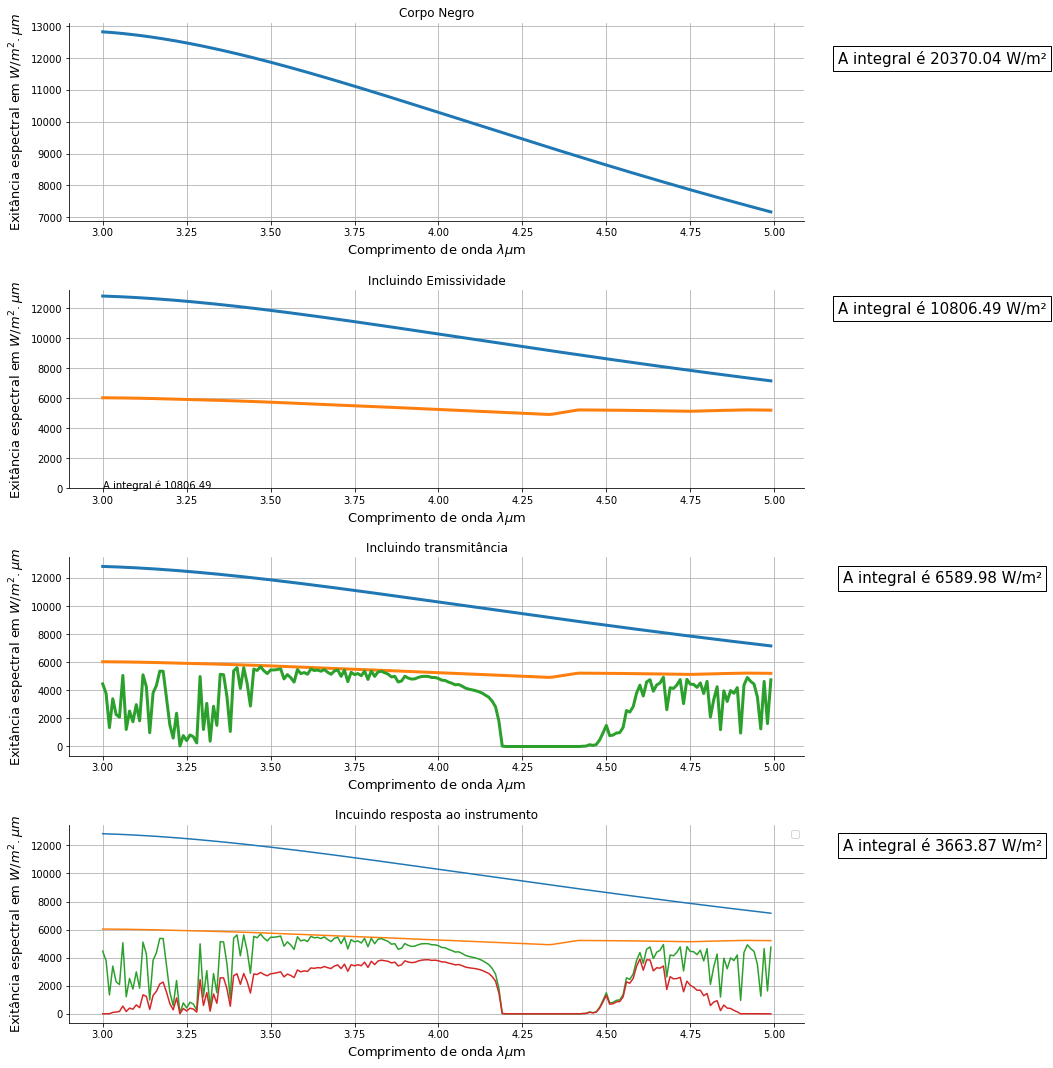

In [330]:
fig = plt.figure(figsize=(15,15))
spec = fig.add_gridspec(nrows=4, ncols=1)

#Primeiro Plote
ax1 = fig.add_subplot(spec[0])
ax1.plot(comp_onda, exit, linewidth = 3, label = 'Corpo Negro')
integral = np.trapz(exit, comp_onda)

ax1.text(
    5.5, 12000, f'A integral é {round(integral, 2)} W/m²', ha="center", va="center", size=15,
    bbox=dict(boxstyle="square,pad=0.3", fc="#ffffff", ec="k", lw=1))
ax1.set_title('Corpo Negro')
ax1.set_xlabel('Comprimento de onda $\lambda{\mu}$m', fontsize = 13)
ax1.set_ylabel('Exitância espectral em $W/m^2 . \mu m$', fontsize = 13)
ax1.grid()

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#Segundo plote
ax2 = fig.add_subplot(spec[1])
emiss = pd.read_csv('/content/obj_emiss.txt', sep = '\t', names = ['comp_onda', 'Emissividade'])
x = emiss['comp_onda']
y = emiss['Emissividade']

dados_emiss = interpolar(x, y, comp_onda)
exit_emiss = M_spectral(1000, comp_onda, dados_emiss)
integral = np.trapz(exit_emiss, comp_onda)

ax2.plot(comp_onda, exit, linewidth = 3)
ax2.plot(comp_onda, exit_emiss,linewidth = 3)

ax2.set_ylim(bottom=0)
ax2.annotate(f'A integral é {round(integral, 2)}', xy=(3,0.5))
ax2.set_title('Incluindo Emissividade')
ax2.set_xlabel('Comprimento de onda $\lambda{\mu}$m', fontsize = 13)
ax2.set_ylabel('Exitância espectral em $W/m^2 . \mu m$', fontsize = 13)

ax2.text(
    5.5, 12000, f'A integral é {round(integral, 2)} W/m²', ha="center", va="center", size=15,
    bbox=dict(boxstyle="square,pad=0.3", fc="#ffffff", ec="k", lw=1))
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid()


#Terceiro plot
ax3 = fig.add_subplot(spec[2])
transmit = pd.read_csv('/content/transm.txt', sep='  ', names = ['comp_onda', 'transmitancia'])
x = transmit['comp_onda']
y = transmit['transmitancia']
dados_transmit = interpolar(x, y, comp_onda)
exit_transmit = M_spectral(1000, comp_onda, dados_emiss, dados_transmit)
integral = np.trapz(exit_transmit, comp_onda)

ax3.plot(comp_onda, exit, linewidth = 3)
ax3.plot(comp_onda, exit_emiss, linewidth = 3)
ax3.plot(comp_onda, exit_transmit, linewidth = 3)

ax3.set_title('Incluindo transmitância')
ax3.set_xlabel('Comprimento de onda $\lambda{\mu}$m', fontsize = 13)
ax3.set_ylabel('Exitância espectral em $W/m^2 . \mu m$', fontsize = 13)

ax3.text(
    5.5, 12000, f'A integral é {round(integral, 2)} W/m²', ha="center", va="center", size=15,
    bbox=dict(boxstyle="square,pad=0.3", fc="#ffffff", ec="k", lw=1))
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid()

#Quarto Plote

ax4 = fig.add_subplot(spec[3])
x = resp['comp_onda']
y = resp['resp']
dados_resp = interpolar(x,y, comp_onda)
exit_resp = M_spectral(1000, comp_onda, dados_emiss, dados_transmit, dados_resp)
integral = np.trapz(exit_resp, comp_onda)

ax4.plot(comp_onda, exit)
ax4.plot(comp_onda, exit_emiss)
ax4.plot(comp_onda, exit_transmit)
ax4.plot(comp_onda, exit_resp)

ax4.text(
    5.5, 12000, f'A integral é {round(integral, 2)} W/m²', ha="center", va="center", size=15,
    bbox=dict(boxstyle="square,pad=0.3", fc="#ffffff", ec="k", lw=1))

ax4.set_xlabel('Comprimento de onda $\lambda{\mu}$m', fontsize = 13)
ax4.set_ylabel('Exitância espectral em $W/m^2 . \mu m$', fontsize = 13)

ax4.set_title('Incuindo resposta ao instrumento')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.grid()

plt.tight_layout()
plt.legend()
plt.show()


---

##**Questão 9**
O cálculo de Radiância pode ser obtido dividindo a potência irradiada por pi.

No primeiro exemplo 3.4.1 os dados utilizados referem-se ao Boeing 707-320 Turbojet

**a)** Radiância de um dos escapamentos

No exemplo do livro a unidade utilizada para a constante de Stefan Boltzman é W/cm².sr,porém no SI deve ser W/m².sr, sendo a radiância representada pela letra "L", conforme foi feito abaixo:


In [287]:
h= 6.63*10e-34 # J*s - cte de Plank
c= 299792458 # m/s - Vel Luz
k= 1.38*10e-23 # J/K - cte Stefan-Boltzman
sigma = 5.67*(10**-8)

T= np.array([635, 515,485])+273.15

area_exaust = 3600 # cm² = 10e-4 m²

In [288]:
M = sigma*T**4
area_proj = np.pi
emissiv = 0.9

In [289]:
L = M*emissiv/area_proj

for i in range(0,len(T)):
    print(f'A Radiância L do escapamento do Boing 707 considerando temperatura de {T[i]}[K] é de {round(L[i],2)} [W/m²*sr]')

A Radiância L do escapamento do Boing 707 considerando temperatura de 908.15[K] é de 11048.57 [W/m²*sr]
A Radiância L do escapamento do Boing 707 considerando temperatura de 788.15[K] é de 6267.74 [W/m²*sr]
A Radiância L do escapamento do Boing 707 considerando temperatura de 758.15[K] é de 5366.56 [W/m²*sr]


**b)** Intensidade radiante de um único motor

A intensidade Radiante é representada pela letra "I" e a unidade de medida no SI é W/sr. Pode-se obter a intensidade radiante do motor multiplicando a Radiância pela área do motor. No exercício a área dada foi de 3660cm² para o cálculo no SI tem que multiplicar a equação do item a) pela área em m². Conforme feito abaixo 

In [290]:
area_noz = 3660e-4


I = L*area_noz

for i in range(0,len(T)):
    print(f'A Intensidade Radiante I à temperatura de {T[i]}[K] é de {round(I[i],2)} [W/sr]')

A Intensidade Radiante I à temperatura de 908.15[K] é de 4043.78 [W/sr]
A Intensidade Radiante I à temperatura de 788.15[K] é de 2293.99 [W/sr]
A Intensidade Radiante I à temperatura de 758.15[K] é de 1964.16 [W/sr]


**c)** Quando os 4 motores estão exatamente dentro do FOV do sensor a intensidade radiante da aeronave pode ser calculada multiplicando a intensidade radiante de cada motor pelo nº de motores (4). Então a intensidade radiante seria 1962.61*4 = 7850,84W/sr. 


In [291]:
for i in range(0,len(T)):
    print(f'A Intensidade Radiante Total à temperatura de {T[i]}[K] é de {round(4*I[i],2)} [W/sr]')

A Intensidade Radiante Total à temperatura de 908.15[K] é de 16175.11 [W/sr]
A Intensidade Radiante Total à temperatura de 788.15[K] é de 9175.98 [W/sr]
A Intensidade Radiante Total à temperatura de 758.15[K] é de 7856.65 [W/sr]


**d)** Conforme o autor do livro, para encontrar a Intensidade Radiante efetiva, temos que 26,6% do fluxo radiante estará entre 3.2$mu$ e 4.8$mu$. Então multiplicamos A intensidade radiante dos motores por 26.6%

In [292]:
for i in range(0,len(T)):
    print(f'A Intensidade Radiante Efetiva de cada motor à temperatura de {T[i]}[K] é de {0.266*round(I[i],2)} [W/sr]')
    
print('\n')
for i in range(0,len(T)):
    print(f'A Intensidade Radiante Efetiva da Anv (4 Motores) à temperatura de {T[i]}[K] é de {4*0.266*round(I[i],2)} [W/sr]')

A Intensidade Radiante Efetiva de cada motor à temperatura de 908.15[K] é de 1075.6454800000001 [W/sr]
A Intensidade Radiante Efetiva de cada motor à temperatura de 788.15[K] é de 610.20134 [W/sr]
A Intensidade Radiante Efetiva de cada motor à temperatura de 758.15[K] é de 522.4665600000001 [W/sr]


A Intensidade Radiante Efetiva da Anv (4 Motores) à temperatura de 908.15[K] é de 4302.5819200000005 [W/sr]
A Intensidade Radiante Efetiva da Anv (4 Motores) à temperatura de 788.15[K] é de 2440.80536 [W/sr]
A Intensidade Radiante Efetiva da Anv (4 Motores) à temperatura de 758.15[K] é de 2089.8662400000003 [W/sr]


Utilizando a integração de 3.2 a 4.8 da exitância multiplicada pela área temos:

In [293]:
area_noz = 3660e-4
comp_onda2 = np.linspace(3.2,4.8, 500)

exitancia=[[]]*len(T)
integral=[[]]*len(T)

for i in range(0,len(T)):
    exitancia[i] = 0.9*M_spectral(T[i], comp_onda2)
    integral[i] = np.trapz(exitancia[i], comp_onda2)

exit_total=[[]]*len(T)
integ_tot=[[]]*len(T)
for i in range(0,len(T)):
    exit_total[i] = 0.9*M_spectral(T[i], np.linspace(0.01,20, 1000))
    integ_tot[i] = np.trapz(exit_total[i], np.linspace(0.01,20, 1000))
    
for i in range(0,len(T)):
    print(f'A Intensidade Radiante Efetiva de cada motor à temperatura de {T[i]}[K] é de {round(area_noz*integral[i]/np.pi,2)} [W/sr]')
    
print('\n')
for i in range(0,len(T)):
    print(f'A Intensidade Radiante Efetiva da Anv (4 Motores) à temperatura de {T[i]}[K] é de {round(area_noz*integ_tot[i]/np.pi,2)} [W/sr]')


A Intensidade Radiante Efetiva de cada motor à temperatura de 908.15[K] é de 1174.11 [W/sr]
A Intensidade Radiante Efetiva de cada motor à temperatura de 788.15[K] é de 628.58 [W/sr]
A Intensidade Radiante Efetiva de cada motor à temperatura de 758.15[K] é de 522.24 [W/sr]


A Intensidade Radiante Efetiva da Anv (4 Motores) à temperatura de 908.15[K] é de 3968.32 [W/sr]
A Intensidade Radiante Efetiva da Anv (4 Motores) à temperatura de 788.15[K] é de 2231.56 [W/sr]
A Intensidade Radiante Efetiva da Anv (4 Motores) à temperatura de 758.15[K] é de 1904.97 [W/sr]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


**3.4.2** Estimar a radiancia da pluma dos dois modelos e comparar.
Assumir que os motores estao no máx cruise thrust

|        Modelo       | 707-320 | 707-320B |
|:-------------------:|:-------:|:--------:|
|    Max°C TakeOff    |   635   |    555   |
|  Max°C Cont Thrust  |   515   |    490   |
|** Max°C Cruise Thrust** | **485** |** 445** |


In [294]:
Modelo=['707-320', '707-320B']
T = np.array([485,445])+273.15
area_proj = np.pi #esfera
comp_onda2 = np.linspace(3.2,4.8, 500)

exitancia=[[]]*len(T)
integral=[[]]*len(T)

for i in range(0,len(T)):
    exitancia[i] = M_spectral(T[i], comp_onda2)
    integral[i] = np.trapz(exitancia[i], comp_onda2)

L = 0.9*np.array(exitancia)/area_proj
rad_tot = np.trapz(L, comp_onda2)

print('Na faixa considerada de 3 a 5 μm temos:\n')
    
for i in range(0,len(T)):
    print(f'A Radiancia por motor do Boing {Modelo[i]} é de {round(rad_tot[i],2)} [W/m²sr]')

print('\n')
for i in range(0,len(T)):
    print(f'A Radiancia total do Boing {Modelo[i]} é de {round(4*rad_tot[i],2)} [W/m²sr]')

Na faixa considerada de 3 a 5 μm temos:

A Radiancia por motor do Boing 707-320 é de 1426.89 [W/m²sr]
A Radiancia por motor do Boing 707-320B é de 1089.35 [W/m²sr]


A Radiancia total do Boing 707-320 é de 5707.56 [W/m²sr]
A Radiancia total do Boing 707-320B é de 4357.4 [W/m²sr]


In [295]:
area_noz = 3660e-4
I=rad_tot*area_noz
print('Na faixa considerada de 3 a 5 μm temos:\n')

for i in range(0,len(T)):
    print(f'A Intensidade Radiante por motor do Boing {Modelo[i]} é de {round(I[i],2)} [W/sr]')

print('\n')
for i in range(0,len(T)):
    print(f'A Intensidade Radiante total do Boing {Modelo[i]} é de {round(4*I[i],2)} [W/sr]')

Na faixa considerada de 3 a 5 μm temos:

A Intensidade Radiante por motor do Boing 707-320 é de 522.24 [W/sr]
A Intensidade Radiante por motor do Boing 707-320B é de 398.7 [W/sr]


A Intensidade Radiante total do Boing 707-320 é de 2088.97 [W/sr]
A Intensidade Radiante total do Boing 707-320B é de 1594.81 [W/sr]


In [296]:
T = np.array([485,445])+273.15
area_proj = np.pi #esfera
comp_onda3 = np.linspace(4.3,4.55, 500)

exitancia=[[]]*len(T)
integral=[[]]*len(T)

for i in range(0,len(T)):
    exitancia[i] = M_spectral(T[i], comp_onda3)
    integral[i] = np.trapz(exitancia[i], comp_onda3)

L = 0.9*np.array(exitancia)/area_proj
rad_tot = np.trapz(L, comp_onda3)

print('Na faixa considerada de 4.3 a 4.55 μm (faixa da PLUMA) temos:\n')
    
for i in range(0,len(T)):
    print(f'A Radiancia por motor do Boing {Modelo[i]} é de {round(rad_tot[i],2)} [W/m²sr]')

print('\n')
for i in range(0,len(T)):
    print(f'A Radiancia total do Boing {Modelo[i]} é de {round(4*rad_tot[i],2)} [W/m²sr]')

Na faixa considerada de 4.3 a 4.55 μm (faixa da PLUMA) temos:

A Radiancia por motor do Boing 707-320 é de 219.69 [W/m²sr]
A Radiancia por motor do Boing 707-320B é de 172.48 [W/m²sr]


A Radiancia total do Boing 707-320 é de 878.77 [W/m²sr]
A Radiancia total do Boing 707-320B é de 689.94 [W/m²sr]
